In [1]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# import libraries

plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)#adjust the config of the plots


# read in the data


df = pd.read_csv(r'/Users/joelignizio/Documents/CodeProjects/CorrelationPython/movies.csv')

In [3]:

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
# look for missing data 

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print(f'{col}: percent missing:  {round(percent_missing, 2)}%')

name: percent missing:  0.0%
rating: percent missing:  0.01%
genre: percent missing:  0.0%
year: percent missing:  0.0%
released: percent missing:  0.0%
score: percent missing:  0.0%
votes: percent missing:  0.0%
director: percent missing:  0.0%
writer: percent missing:  0.0%
star: percent missing:  0.0%
country: percent missing:  0.0%
budget: percent missing:  0.28%
gross: percent missing:  0.02%
company: percent missing:  0.0%
runtime: percent missing:  0.0%


In [5]:
# all data types for columns 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df = df.dropna() #drop null values 

In [7]:
# change the data type of a couple columns 

df['budget'] = df['budget'].astype('int64')
df['gross']  = df['gross'].astype('int64')

In [8]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5421 rows x 15 columns]

In [9]:
#create corrected year column
df['yearcorrected'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [10]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  yearcorrected  
0                            Warner Bros.    146.0           1980  
1                       Columbia Pictures    104.0           1980  
2                               Lucasfilm    124.0           1980  
3                      Paramount Pictures     88.0           1980  
4                          Orion Pictures     98.0           1980  
...                                   ...      ...            ...  
7648                    Columbia Pictures    124.0           2020  
7649                   Paramount Pictures     99.0           2020  
7650                   Universal Pictures    101.0           2020  
7651                 20th Century Studios    100.0           2020  
7652  Beijing Diqi Yinxiang Entertainment    149.0           2020  

[5421 rows x 16 columns]

In [11]:
df.sort_values(by = ['gross'], inplace = False, ascending = False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
5640                                 Tanner Hall          R   Drama  2009   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score      votes  \
5445  December 18, 2009 (United States)    7.8  1100000.0   
7445     April 26, 2019 (United States)    8.4   903000.0   
3045  December 19, 1997 (United States)    7.8  1100000.0   
6663  December 18, 2015 (United States)    7.8   876000.0   
7244     April 27, 2018 (United States)    8.4   897000.0   
...                                 ...    ...        ...   
5640          January 15, 2015 (Sweden)    5.8     3500.0   
2434         June 4, 1994 (South Korea)    4.5     1900.0   
3681              May 11, 2001 (Canada)    6.8    43000.0   
272      March 12, 1982 (United States)    3.9     2300.0   
3203           October 1, 1997 (Brazil)    5.7     5800.0   

                 director                   writer               star  \
5445        James Cameron            James Cameron    Sam Worthington   
7445        Anthony Russo       Christopher Markus  Robert Downey Jr.   
3045        James Cameron            James Cameron  Leonardo DiCaprio   
6663          J.J. Abrams          Lawrence Kasdan       Daisy Ridley   
7244        Anthony Russo       Christopher Markus  Robert Downey Jr.   
...                   ...                      ...                ...   
5640  Francesca Gregorini  Tatiana von Fürstenberg        Rooney Mara   
2434     Stephen Cornwell       Wallace C. Bennett       Brad Johnson   
3681         John Fawcett             Karen Walton      Emily Perkins   
272          Charles Band            Alan J. Adler    Robert Glaudini   
3203         George Huang                Andy Burg       Will Friedle   

            country     budget       gross                    company  \
5445  United States  237000000  2847246203      Twentieth Century Fox   
7445  United States  356000000  2797501328             Marvel Studios   
3045  United States  200000000  2201647264      Twentieth Century Fox   
6663  United States  245000000  2069521700                  Lucasfilm   
7244  United States  321000000  2048359754             Marvel Studios   
...             ...        ...         ...                        ...   
5640  United States    3000000        5073           Two Prong Lesson   
2434  United States    5000000        2970           Trimark Pictures   
3681         Canada    5000000        2554  Copperheart Entertainment   
272   United States     800000        2270           Embassy Pictures   
3203  United States   15000000         309                   Daybreak   

      runtime  yearcorrected  
5445    162.0           2009  
7445    181.0           2019  
3045    194.0           1997  
6663    138.0           2015  
7244    149.0           2018  
...       ...            ...  
5640     96.0           2015  
2434     97.0           1994  
3681    108.0           2001  
272      85.0           1982  
3203     85.0           1997  

[5421 rows x 16 columns]

In [12]:
pd.set_option('display.max_rows', None)

In [12]:
df

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
33                     Cattle Annie and Little Britches         PG      Drama   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
42                                        The Stunt Man          R     Action   
46                                           The Island          R     Action   
48                                        The Nude Bomb         PG     Action   
50                                    Stardust Memories         PG     Comedy   
51                                    Melvin and Howard          R     Comedy   
53                                         Bronco Billy         PG     Action   
56                                 When Time Ran Out...         PG     Action   
57                                      Oh Heavenly Dog         PG     Comedy   
58                                          The Octagon          R     Action   
75                        The Last Flight of Noah's Ark          G  Adventure   
77                                        Willie & Phil          R     Comedy   
80                                               Phobia          R      Drama   
92        Indiana Jones and the Raiders of the Lost Ark         PG     Action   
94                       An American Werewolf in London          R     Comedy   
95                                 Escape from New York          R     Action   
96                                        The Evil Dead      NC-17     Horror   
97                                              Porky's          R     Comedy   
98                                             Blow Out          R      Crime   
99                                  Clash of the Titans         PG     Action   
100                                           Excalibur          R  Adventure   
101                                           Mad Max 2          R     Action   
1

In [13]:
#drop any duplicates 
df['company'].drop_duplicates().sort_values(ascending = False )

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [27]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  yearcorrected  
0   699       46  19000000   46998772     1426    146.0           1980  
1   214       47   4500000   58853106      452    104.0           1980  
2  1157       47  18000000  538375067      945    124.0           1980  
3  1474       47   3500000   83453539     1108     88.0           1980  
4   271       47   6000000   39846344     1083     98.0           1980

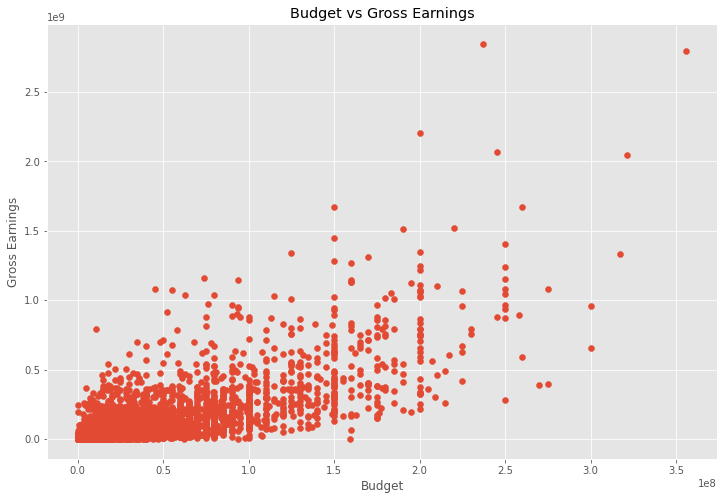

In [14]:
#Scatterplot with budget vs gross



plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

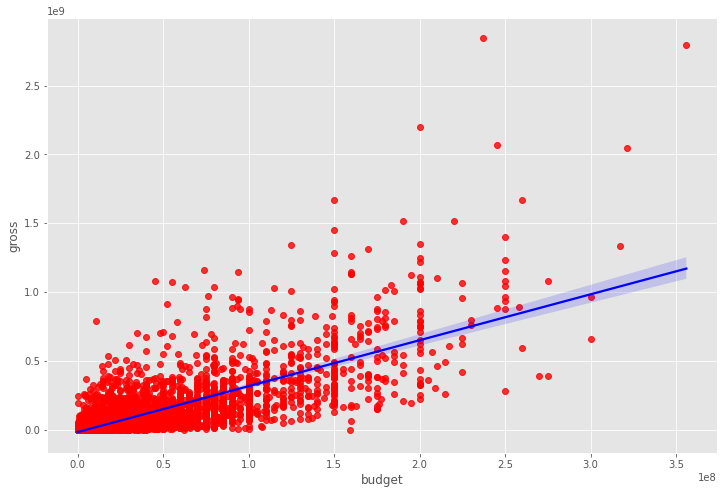

In [15]:
#plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df , scatter_kws = {"color": "red"}, line_kws = {"color":"blue"})

In [16]:
#correlation inspection, can be 3 main different types

df.corr(method = 'pearson') #pearson
                            #kendall
                            #spearman

year     score     votes    budget     gross   runtime  \
year           1.000000  0.056386  0.206021  0.327722  0.274321  0.075077   
score          0.056386  1.000000  0.474256  0.072001  0.222556  0.414068   
votes          0.206021  0.474256  1.000000  0.439675  0.614751  0.352303   
budget         0.327722  0.072001  0.439675  1.000000  0.740247  0.318695   
gross          0.274321  0.222556  0.614751  0.740247  1.000000  0.275796   
runtime        0.075077  0.414068  0.352303  0.318695  0.275796  1.000000   
yearcorrected  0.998726  0.061923  0.203098  0.320312  0.268721  0.075294   

               yearcorrected  
year                0.998726  
score               0.061923  
votes               0.203098  
budget              0.320312  
gross               0.268721  
runtime             0.075294  
yearcorrected       1.000000

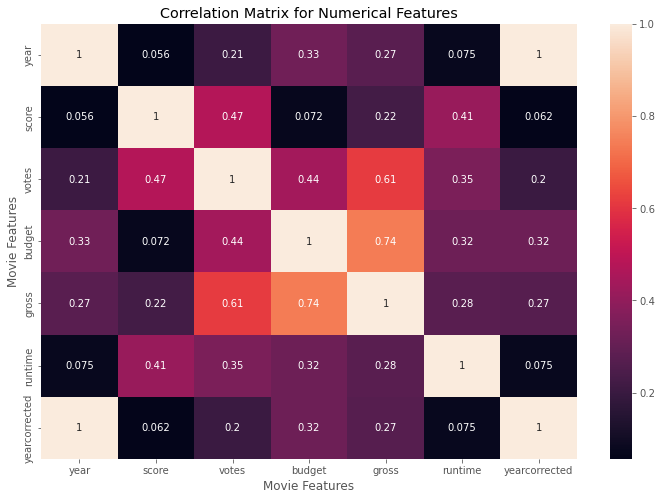

In [17]:
correlation_matrix = df.corr(method = 'pearson') 

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numerical Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')



plt.show()

In [18]:
#Looking at company

df.head() 



name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  yearcorrected  
0   46998772        Warner Bros.    146.0           1980  
1   58853106   Columbia Pictures    104.0           1980  
2  538375067           Lucasfilm    124.0           1980  
3   83453539  Paramount Pictures     88.0           1980  
4   39846344      Orion Pictures     98.0           1980

In [28]:
#numerized

df_numerized = df


for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype=='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()        
        
        

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  yearcorrected  
0   699       46  19000000   46998772     1426    146.0           1980  
1   214       47   4500000   58853106      452    104.0           1980  
2  1157       47  18000000  538375067      945    124.0           1980  
3  1474       47   3500000   83453539     1108     88.0           1980  
4   271       47   6000000   39846344     1083     98.0           1980

In [26]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  yearcorrected  
0   699       46  19000000   46998772     1426    146.0           1980  
1   214       47   4500000   58853106      452    104.0           1980  
2  1157       47  18000000  538375067      945    124.0           1980  
3  1474       47   3500000   83453539     1108     88.0           1980  
4   271       47   6000000   39846344     1083     98.0           1980

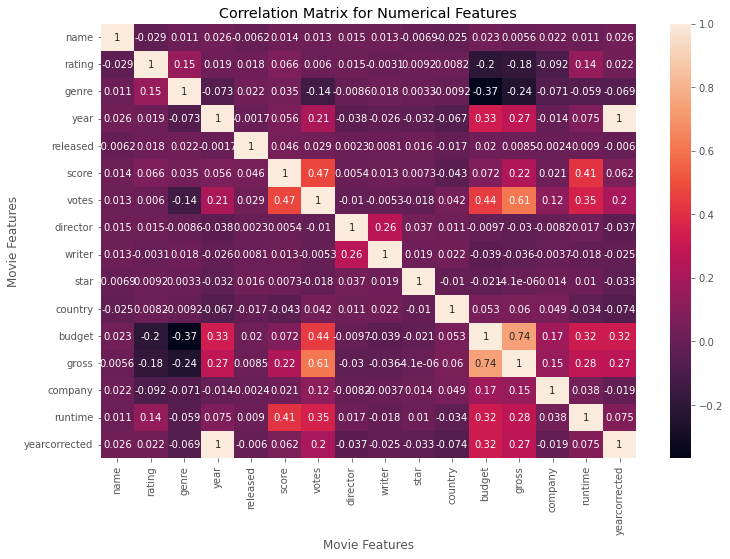

In [20]:
correlation_matrix = df_numerized.corr(method = 'pearson') 

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numerical Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')



plt.show()

In [31]:
correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.029234
      genre       0.010996
      year        0.025542
      released   -0.006152
dtype: float64

In [32]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head() 

genre   budget   -0.368523
budget  genre    -0.368523
gross   genre    -0.244101
genre   gross    -0.244101
rating  budget   -0.203946
dtype: float64

In [25]:
high_corr =  sorted_pairs[(sorted_pairs)> 0.5]
high_corr

gross          votes            0.614751
votes          gross            0.614751
gross          budget           0.740247
budget         gross            0.740247
year           yearcorrected    0.998726
yearcorrected  year             0.998726
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
yearcorrected  yearcorrected    1.000000
dtype: float64

In [ ]:
#votes and budget have the highest correlation 